<a href="https://colab.research.google.com/github/pkolakal/IT7103/blob/main/pkolakal_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Part 1: Importing the Data and Splitting into Training and Testing Sets

In [9]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # For splitting the dataset and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression
from sklearn.ensemble import RandomForestRegressor  # For random forest regression
from sklearn.metrics import mean_squared_error, r2_score  # For performance metrics
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization

# Load the dataset from the provided file path
file_path = 'real_estate_value.csv'
data = pd.read_csv(file_path)

# Display the first four rows of the dataset to understand its structure
print(data.head(4))

# Define the feature columns and the target variable
features = ['HouseAge', 'DistanceToMRT', 'NoOfStores', 'Latitude', 'Longitude']
target = 'UnitPrice'

# Separate the features (X) and the target variable (y)
X = data[features]
y = data[target]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to ensure they are correct
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


   HouseAge  DistanceToMRT  NoOfStores  Latitude  Longitude  UnitPrice
0      32.0       84.87882          10  24.98298  121.54024       37.9
1      19.5      306.59470           9  24.98034  121.53951       42.2
2      13.3      561.98450           5  24.98746  121.54391       47.3
3      13.3      561.98450           5  24.98746  121.54391       54.8
Training data shape: (331, 5), Testing data shape: (83, 5)


In [3]:
#Part 2: Examining and Preprocessing the Data

In [4]:
#Checking for Missing Values:
#Justification: Missing values can lead to inaccurate model predictions. Checking for missing values helps determine if imputation or data cleaning is needed.

#Summary Statistics:
#Justification: Summary statistics give insights into the central tendency, dispersion, and shape of the data distribution, helping identify any anomalies or outliers.

#Data Visualization:

#Distribution of Target Variable (UnitPrice):
#Justification: Visualizing the distribution helps understand the spread and skewness of the target variable, which can impact model performance.

#Correlation Matrix:
#Justification: The correlation matrix shows the relationships between features and the target variable, helping identify multicollinearity and the importance of each feature.

#Feature Scaling:
#Justification: Feature scaling ensures that all features contribute equally to the model performance by bringing them to a similar scale. This is crucial for algorithms that rely on distance measurements (e.g., Decision Trees, Random Forests).

Missing values in the dataset:
HouseAge         0
DistanceToMRT    0
NoOfStores       0
Latitude         0
Longitude        0
UnitPrice        0
dtype: int64
         HouseAge  DistanceToMRT  NoOfStores    Latitude   Longitude  \
count  414.000000     414.000000  414.000000  414.000000  414.000000   
mean    17.712560    1083.885689    4.094203   24.969030  121.533361   
std     11.392485    1262.109595    2.945562    0.012410    0.015347   
min      0.000000      23.382840    0.000000   24.932070  121.473530   
25%      9.025000     289.324800    1.000000   24.963000  121.528085   
50%     16.100000     492.231300    4.000000   24.971100  121.538630   
75%     28.150000    1454.279000    6.000000   24.977455  121.543305   
max     43.800000    6488.021000   10.000000   25.014590  121.566270   

        UnitPrice  
count  414.000000  
mean    37.980193  
std     13.606488  
min      7.600000  
25%     27.700000  
50%     38.450000  
75%     46.600000  
max    117.500000  


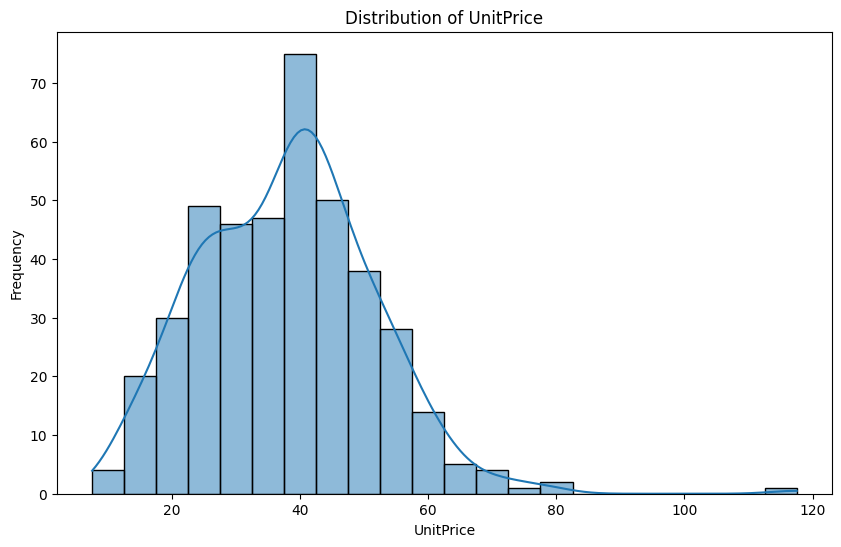

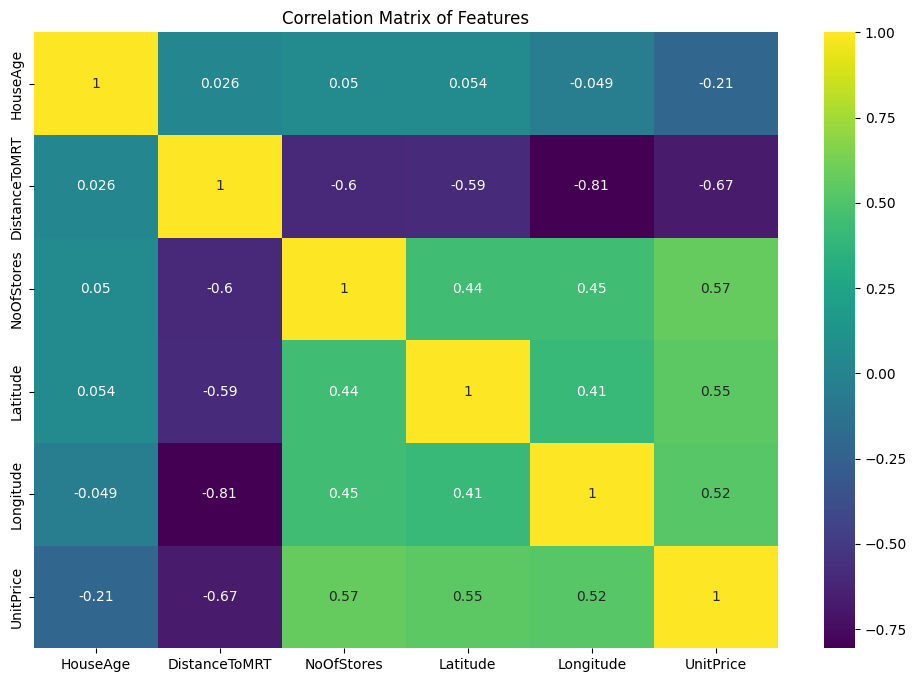

First 5 rows of scaled training data:
[[ 2.34401494 -0.82396519  0.96804159 -0.14706597  0.45505725]
 [-0.82128138  0.9514177  -0.04917037 -0.74311697 -1.35592638]
 [-0.90085586  0.91722447 -0.38824102 -0.50405479 -1.42748297]
 [ 1.70741903 -0.46936116  1.30711224  0.06552288  0.73927735]
 [-0.86548943 -0.3453566   0.28990029  0.26046285  0.95327837]]


In [14]:
# Check the dataset for any missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Justification: Checking for missing values ensures we address any gaps in the data, which could otherwise lead to inaccurate model predictions.

# Check the summary statistics of the dataset
print(data.describe())

# Justification: Summary statistics provide an overview of the data, helping identify potential outliers or anomalies.

# Visualize the data distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (UnitPrice)
plt.figure(figsize=(10, 6))
sns.histplot(data['UnitPrice'], kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# Justification: Visualizing the distribution of UnitPrice helps understand its spread and skewness, which can impact model performance.

# Visualize the correlation matrix with a different color palette
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Features')
plt.show()


# Justification: The correlation matrix helps identify relationships between features and the target variable, highlighting potential multicollinearity issues.

# Preprocessing steps
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled training data
print("First 5 rows of scaled training data:")
print(X_train_scaled[:5])

# Justification: Feature scaling ensures that all features contribute equally to the model by bringing them to a similar scale. This is crucial for algorithms that rely on distance measurements.


In [10]:
#Part 3: Training and Fine-Tuning Models

In [13]:
# Define the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning the Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation for the Decision Tree model
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train_scaled, y_train)

# Get the best Decision Tree model from the grid search
best_dt_model = dt_grid_search.best_estimator_

# Define the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning the Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search with cross-validation for the Random Forest model
rf_random_search = RandomizedSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Get the best Random Forest model from the random search
best_rf_model = rf_random_search.best_estimator_

# Predict on training and testing data using the best Decision Tree model
dt_train_pred = best_dt_model.predict(X_train_scaled)
dt_test_pred = best_dt_model.predict(X_test_scaled)

# Predict on training and testing data using the best Random Forest model
rf_train_pred = best_rf_model.predict(X_train_scaled)
rf_test_pred = best_rf_model.predict(X_test_scaled)

# Calculate performance metrics for the Decision Tree model
dt_train_mse = mean_squared_error(y_train, dt_train_pred)
dt_test_mse = mean_squared_error(y_test, dt_test_pred)
dt_train_r2 = r2_score(y_train, dt_train_pred)
dt_test_r2 = r2_score(y_test, dt_test_pred)

# Calculate performance metrics for the Random Forest model
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

# Print the performance metrics for both models
print("Decision Tree Performance:")
print(f"Train MSE: {dt_train_mse}, Test MSE: {dt_test_mse}")
print(f"Train R2: {dt_train_r2}, Test R2: {dt_test_r2}")

print("Random Forest Performance:")
print(f"Train MSE: {rf_train_mse}, Test MSE: {rf_test_mse}")
print(f"Train R2: {rf_train_r2}, Test R2: {rf_test_r2}")


Decision Tree Performance:
Train MSE: 28.781198098171796, Test MSE: 45.66134307875845
Train R2: 0.8469821829290901, Test R2: 0.7278170444921795
Random Forest Performance:
Train MSE: 33.18611271745792, Test MSE: 32.352146891696584
Train R2: 0.8235630598916195, Test R2: 0.8071519065302852
